### Linear Regression
1. Preprocess Test data and get predictions
2. Compute Mean Abolute Error, Mean Square error for test data
3. Implement Ridge and Lasso Regression and then compute the following metrics on test data

In [26]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 101)

In [27]:
data = pd.read_csv("train.csv")

In [28]:
data = data.drop(columns=['id', 'timestamp','country'])

In [29]:
# replace NANs in hours_per_week with median value of the column  
data.loc[data['hours_per_week'].isna(), 'hours_per_week'] = data['hours_per_week'].median()
data.loc[data['telecommute_days_per_week'].isna(), 'telecommute_days_per_week'] = data['telecommute_days_per_week'].median()

In [30]:
data = data.dropna()

In [31]:
data_train = data.copy()
data_train.head()

,employment_status,job_title,job_years,is_manager,hours_per_week,telecommute_days_per_week,education,is_education_computer_related,certifications,salary
0,Full time,Developer,4.78393,Yes,40.0,0.0,Bachelors (4 years),Yes,No,7187.743094
1,Full time,DBA,5.00000,No,40.0,5.0,Bachelors (4 years),Yes,No,10000.000000
2,Full time,DBA,1.00000,No,40.0,0.0,Masters,Yes,Yes,7000.000000
3,Full time,DBA,1.00000,No,40.0,2.0,Bachelors (4 years),No,No,8333.000000
4,Full time,Developer,3.00000,No,40.0,2.0,Masters,Yes,Yes,7137.000000


In [32]:
cat_cols = [c for c in data_train.columns if data_train[c].dtype == 'object' 
            and c not in ['is_manager', 'certifications']]
cat_data = data_train[cat_cols]
cat_cols

['employment_status',
 'job_title',
 'education',
 'is_education_computer_related']

In [33]:
binary_cols = ['is_manager', 'certifications']
for c in binary_cols:
    data_train[c] = data_train[c].replace(to_replace=['Yes'], value=1)
    data_train[c] = data_train[c].replace(to_replace=['No'], value=0)

In [34]:
final_data = pd.get_dummies(data_train, columns=cat_cols, drop_first= True)
final_data.shape

(4261, 25)

In [35]:
y = final_data['salary']
X = final_data.drop(columns=['salary'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("Training Set Dimensions:", X_train.shape)
print("Validation Set Dimensions:", X_test.shape)

Training Set Dimensions: (2982, 24)
Validation Set Dimensions: (1279, 24)


In [36]:
num_cols = ['job_years','hours_per_week','telecommute_days_per_week']

In [37]:
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])

In [38]:
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [39]:
reg.coef_

array([ 2.05419259e+02,  1.88866737e+01,  2.19207200e+02,  2.05780379e+02,
        9.66850171e+01, -4.71285131e+01,  1.69243947e+02, -2.06891471e+03,
        1.23412953e+03,  9.85116210e+02,  1.03672896e+03,  6.55742026e+02,
        1.24913139e+03,  1.02354448e+03,  8.76569608e+01,  1.06329905e+03,
        4.54747351e-13,  3.74096775e+03,  3.62944402e+02,  8.47832186e+01,
        1.82914569e+02,  2.05433204e+02, -3.26863179e+02, -2.25811464e+02])

In [40]:
reg.intercept_

6055.109990242358

In [41]:
mean_absolute_error(y_train,reg.predict(X_train))

850.5086523192859

In [42]:
mean_squared_error(y_train,reg.predict(X_train))**0.5

1192.3198161528037

#### 1. Preprocess Test data and get predictions


In [43]:
X_test

,job_years,is_manager,hours_per_week,telecommute_days_per_week,certifications,employment_status_Independent or freelancer or company owner,employment_status_Part time,job_title_Analytics consultant,job_title_Architect,job_title_DBA,job_title_Data Scientist,job_title_Developer,job_title_Engineer,job_title_Manager,job_title_Other,job_title_Principal database engineer,job_title_Sales,job_title_Sr Consultant,education_Bachelors (4 years),education_Doctorate/PhD,education_Masters,education_None (no degree completed),is_education_computer_related_Unknown,is_education_computer_related_Yes
3862,5.000000,0,40.000000,0.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
57,5.000000,0,37.000000,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2127,5.000000,1,40.000000,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3308,2.000000,0,40.000000,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2717,10.000000,0,41.000000,2.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,4.000000,1,44.000000,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4161,3.492174,0,41.503423,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2496,3.793844,0,41.774201,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4044,1.000000,0,40.000000,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [44]:
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [45]:
X_test

,job_years,is_manager,hours_per_week,telecommute_days_per_week,certifications,employment_status_Independent or freelancer or company owner,employment_status_Part time,job_title_Analytics consultant,job_title_Architect,job_title_DBA,job_title_Data Scientist,job_title_Developer,job_title_Engineer,job_title_Manager,job_title_Other,job_title_Principal database engineer,job_title_Sales,job_title_Sr Consultant,education_Bachelors (4 years),education_Doctorate/PhD,education_Masters,education_None (no degree completed),is_education_computer_related_Unknown,is_education_computer_related_Yes
3862,0.261459,0,-0.498087,-0.635393,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
57,0.261459,0,-2.184235,-0.635393,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2127,0.261459,1,-0.498087,-0.635393,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3308,-1.254037,0,-0.498087,-0.635393,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2717,2.787285,0,0.063962,0.560782,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,-0.243707,1,1.750109,-0.037305,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4161,-0.500243,0,0.346910,-0.037305,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2496,-0.347849,0,0.499101,-0.037305,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4044,-1.759202,0,-0.498087,-0.635393,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [51]:
y_Test_pred = reg.predict(X_test)

#### 2. Compute Mean Abolute Error, Mean Square error for test data

In [47]:
mean_absolute_error(y_test,reg.predict(X_test))

888.0136168146308

In [48]:
mean_squared_error(y_test,reg.predict(X_test))**0.5

1269.6532890831743

#### 3. Implement Ridge and Lasso Regression and then compute the following metrics on test data

In [52]:
ridge = Ridge(alpha=1)
ridge.fit(X_train,y_train)

Ridge(alpha=1)

In [53]:
y_pred = ridge.predict(X_test)

In [55]:
mean_absolute_error(y_test,y_pred)

887.1079332530271

In [58]:
mean_squared_error(y_test,y_pred)**0.5

1268.3665429672253

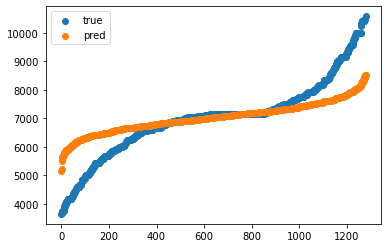

In [59]:
plt.scatter(np.arange(len(np.sort(y_test))),np.sort(y_test), label='true')
plt.scatter(np.arange(len(np.sort(y_pred))),np.sort(y_pred), label = 'pred')
plt.legend()

885.1322065418054 1266.3957130290842


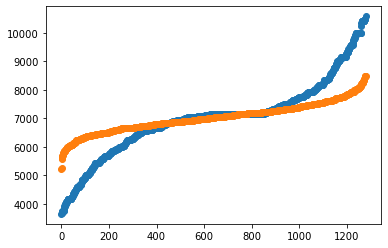

In [60]:
lasso = Lasso(alpha=1)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)
print(mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred)**0.5)

plt.scatter(np.arange(len(np.sort(y_test))),np.sort(y_test))
plt.scatter(np.arange(len(np.sort(y_pred))),np.sort(y_pred))

## Trees
#### 1. Compute errors on test sets

In [61]:
# Train a Decision Tree regression model with the specified parameters
decisiontree = DecisionTreeRegressor(max_depth=10, min_samples_split=5)
decisiontree.fit(X_train, y_train)

# Evaluate training error
train_predictions = decisiontree.predict(X_train)
train_error = mean_absolute_error(y_train, train_predictions)
print("Training Error:", train_error)

# Evaluate test error
test_predictions = decisiontree.predict(X_test)
test_error = mean_absolute_error(y_test, test_predictions)
print("Test Error:", test_error)

Training Error: 613.1401587169462
Test Error: 927.5706431433096


#### 2. Play with different parameter of decision trees and random forests and see the impact on train and test error


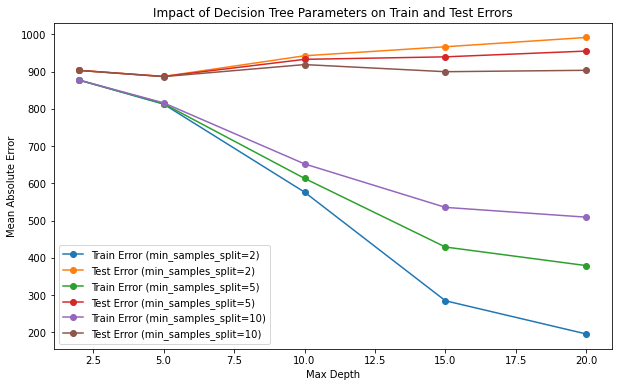

In [62]:
max_depth_list = [2, 5, 10, 15, 20]
min_samples_split_list = [2, 5, 10]

train_errors = []
test_errors = []

for max_depth in max_depth_list:
    for min_samples_split in min_samples_split_list:
        decisiontree = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split)
        decisiontree.fit(X_train, y_train)
        
        # Evaluate training error
        train_predictions = decisiontree.predict(X_train)
        train_error = mean_absolute_error(y_train, train_predictions)
        
        # Evaluate test error
        test_predictions = decisiontree.predict(X_test)
        test_error = mean_absolute_error(y_test, test_predictions)
        
        train_errors.append(train_error)
        test_errors.append(test_error)

# Reshape the results for plotting
train_errors = np.array(train_errors).reshape(len(max_depth_list), len(min_samples_split_list))
test_errors = np.array(test_errors).reshape(len(max_depth_list), len(min_samples_split_list))

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

for i, min_samples_split in enumerate(min_samples_split_list):
    ax.plot(max_depth_list, train_errors[:, i], label=f'Train Error (min_samples_split={min_samples_split})', marker='o')
    ax.plot(max_depth_list, test_errors[:, i], label=f'Test Error (min_samples_split={min_samples_split})', marker='o')

ax.set_xlabel('Max Depth')
ax.set_ylabel('Mean Absolute Error')
ax.set_title('Impact of Decision Tree Parameters on Train and Test Errors')
ax.legend()
plt.show()


Initial Training Error: 380.25723633557607
Initial Test Error: 825.9101692751896


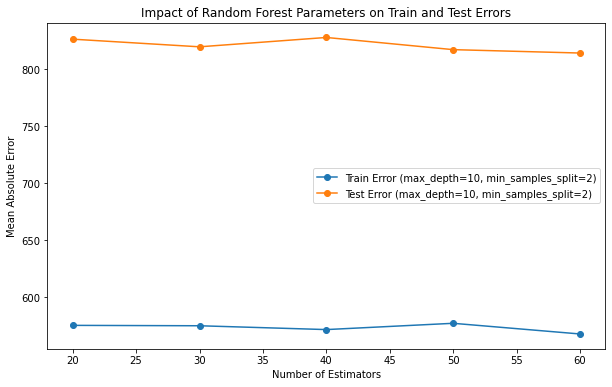

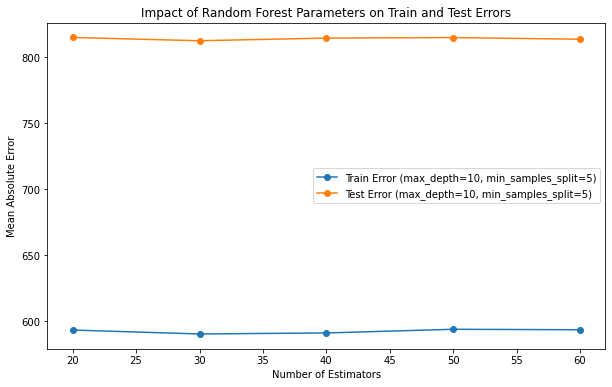

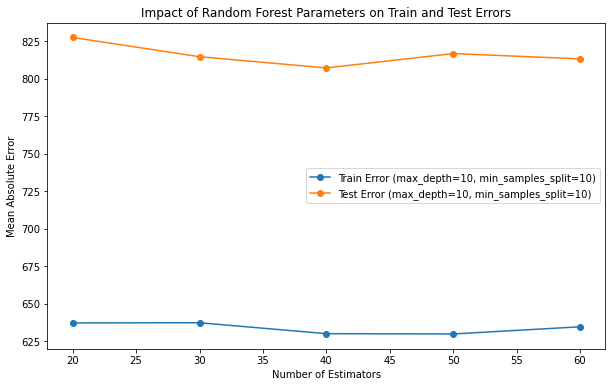

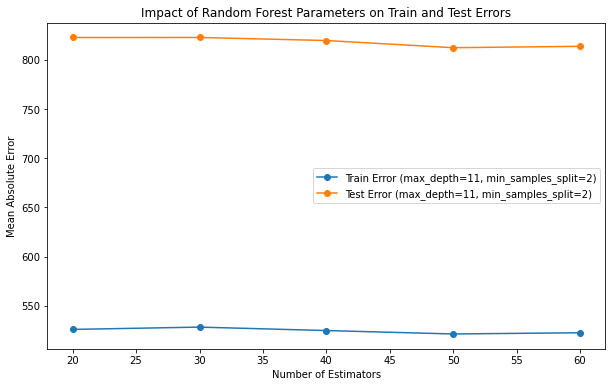

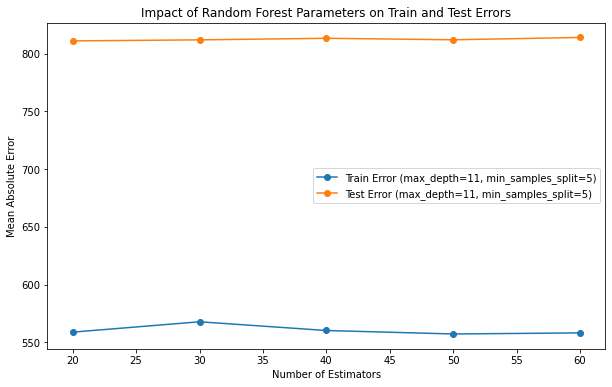

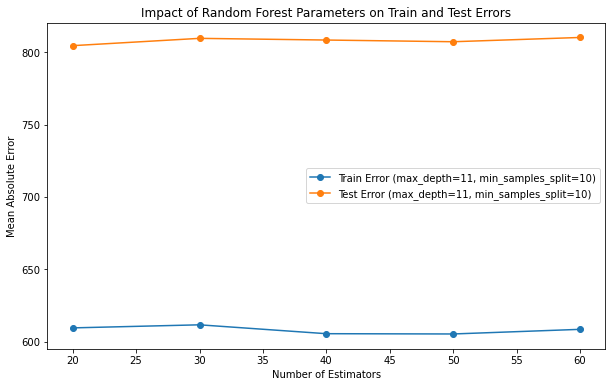

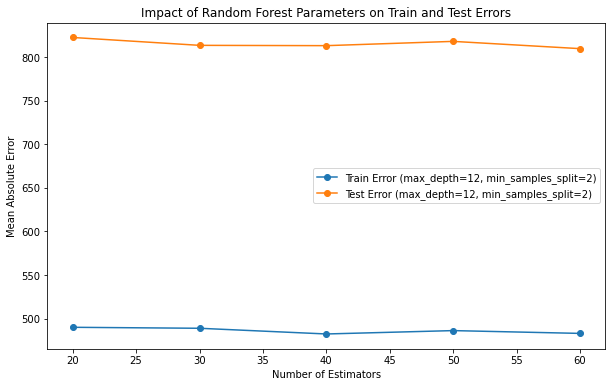

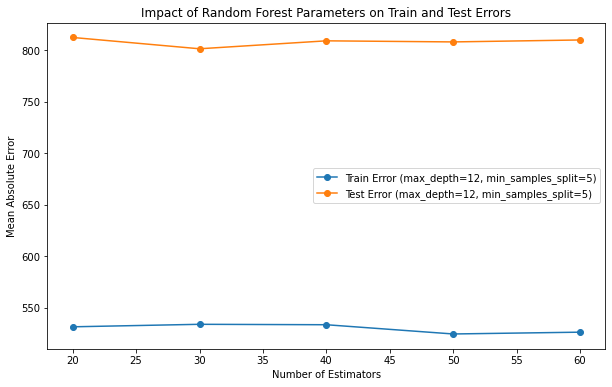

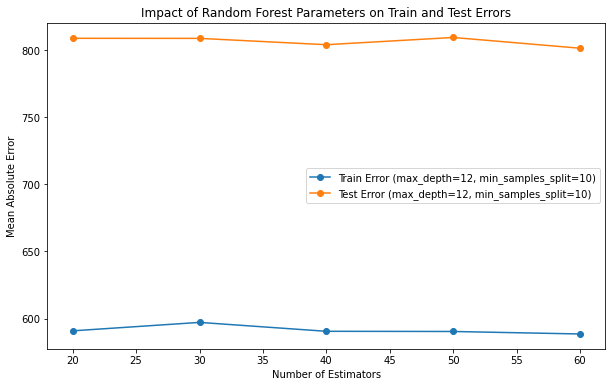

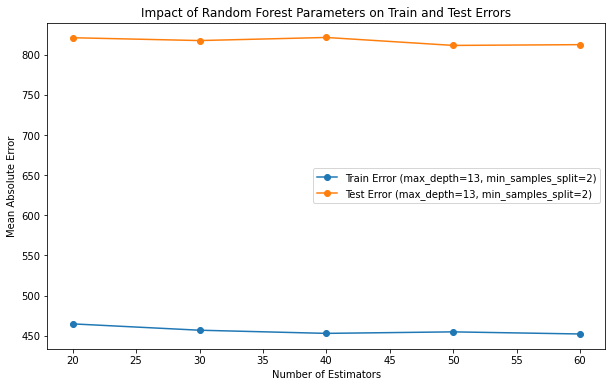

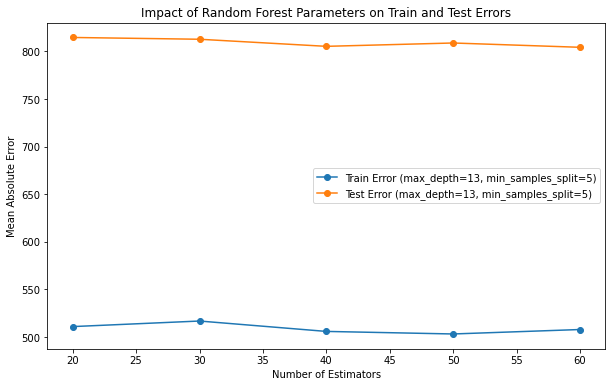

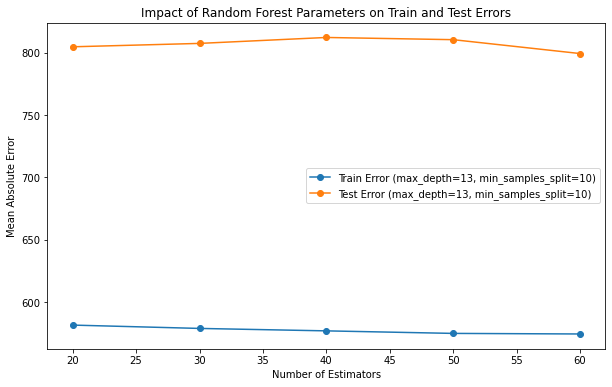

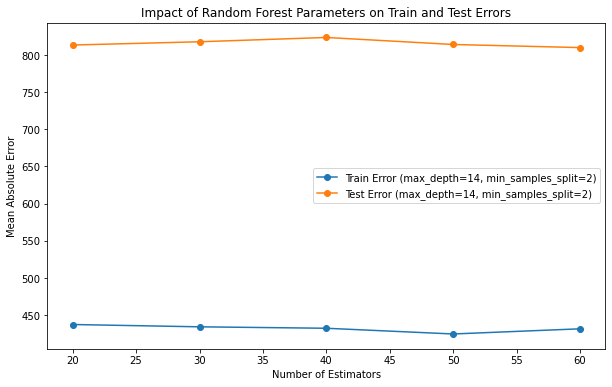

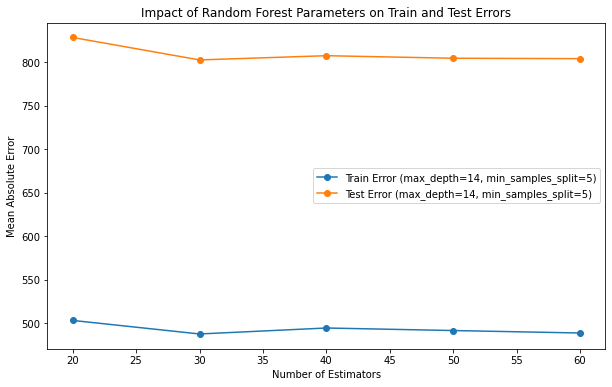

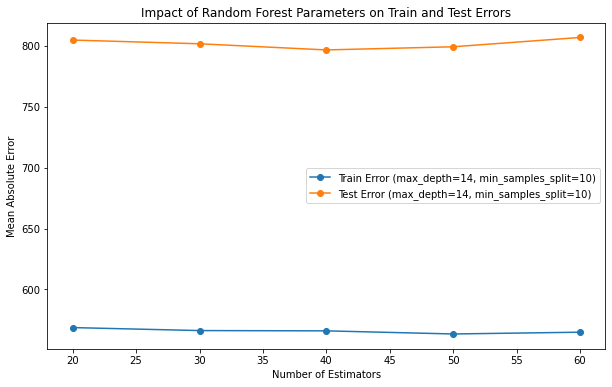

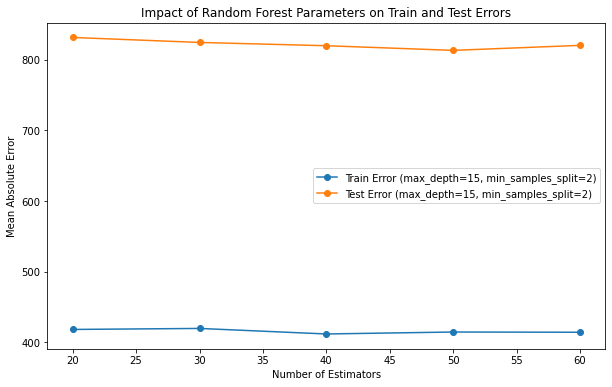

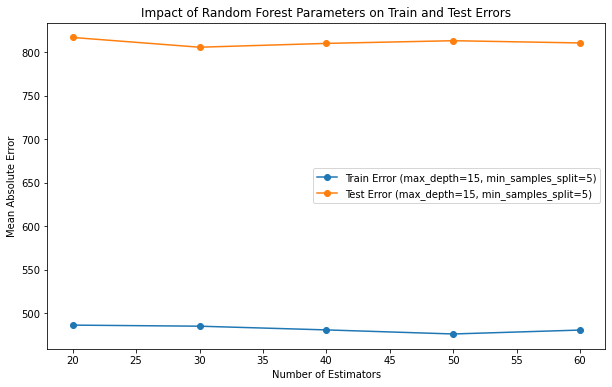

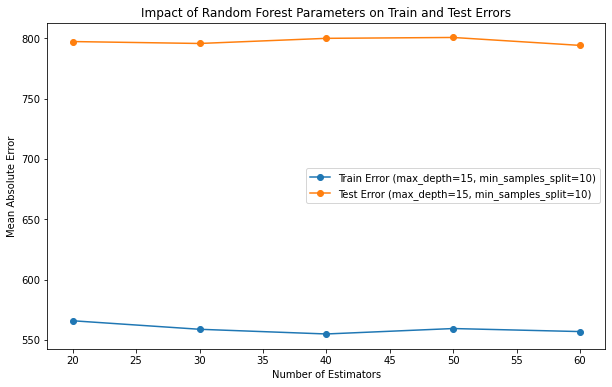

In [63]:
from sklearn.ensemble import RandomForestRegressor

randomf = RandomForestRegressor()
randomf.fit(X_train, y_train)

train_error_initial = mean_absolute_error(y_train, randomf.predict(X_train))
print("Initial Training Error:", train_error_initial)

test_error_initial = mean_absolute_error(y_test, randomf.predict(X_test))
print("Initial Test Error:", test_error_initial)

max_depth_list = [10, 11, 12, 13, 14, 15]
min_samples_split_list = [2, 5, 10]
n_estimators_list = [20, 30, 40, 50, 60]

for max_depth in max_depth_list:
    for min_samples_split in min_samples_split_list:
        train_errors = []
        test_errors = []
        for n_estimators in n_estimators_list:
            random_forest = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split)
            random_forest.fit(X_train, y_train)
            
            # Evaluate training error
            train_error = mean_absolute_error(y_train, random_forest.predict(X_train))
            train_errors.append(train_error)
            
            # Evaluate test error
            test_error = mean_absolute_error(y_test, random_forest.predict(X_test))
            test_errors.append(test_error)

        # Plotting
        plt.figure(figsize=(10, 6))
        plt.plot(n_estimators_list, train_errors, marker='o', label=f'Train Error (max_depth={max_depth}, min_samples_split={min_samples_split})')
        plt.plot(n_estimators_list, test_errors, marker='o', label=f'Test Error (max_depth={max_depth}, min_samples_split={min_samples_split})')
        plt.xlabel('Number of Estimators')
        plt.ylabel('Mean Absolute Error')
        plt.title('Impact of Random Forest Parameters on Train and Test Errors')
        plt.legend()
        plt.show()
